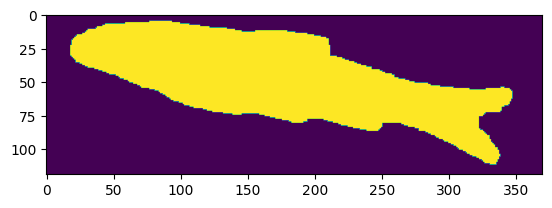

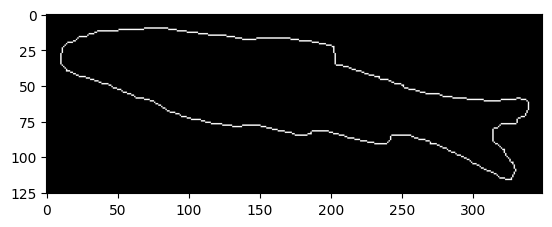

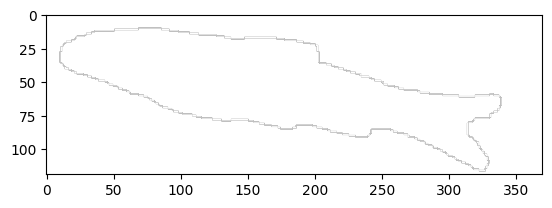

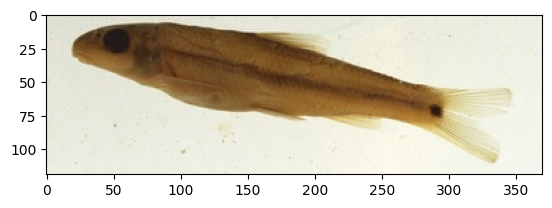

ValueError: image has wrong mode

In [16]:
from inhs_outlining import *
import matplotlib.pyplot as plt

fish1 = Fish.with_id("56675")

#this is the new function i created that has some adjustments - it builds off of .mask
#  show_contour(fish1.new_outline) - 2 steps back...
plt.imshow(fish1.new_mask) # new mask...


#this is the mask created from binarizing saturation img
#  plt.imshow(fish1.mask) - same as new mask atp, gonna see outline now
showim(make_contour_im(fish1.new_outline)) # new outline is a little bigger but it also starts further to the right than necessary
#and removing origin centering didn't really change anything so ima add it back
#maybe add spatial resoluton bit - still too big! ~~~~I FORGOT TO SAVE..........
#gonna check normalized outline to see if i can find anythign - subtracting centroid/centering@0?
#TAKING AWAY SPATIAL RESOLUTION, but adding center at 0...
#ok that helped...but it's all up on it i feel like no padding no nothing
#guess i can try to overlay them now?? w/ my prev. techniques
#ok we gotta fix the no padding no nothing bc when i overlay them it looks weird - maybe i add back kthe scale factor and re do it?
#im going back and im gonna take away spatial resolution - that's cool, but something in outline is killing the crop
#i think if we make a regular outline w/ no cropping of mask image we'll be ok - OR MAYBE... something with make_contour image...

bleep = make_contour_im2(fish1, fish1.new_outline)
boop = make_img_transparent(bleep)

plt.imshow(boop)
fish1.show()
print()

from PIL import Image
import tempfile

someList=  [fish1]

for fish in someList:
    outlinePath = f"{fish.id}outline.png"
    trueImagePath = f"{fish.id}image.png"
    countour_image = make_img_transparent(make_contour_im2(fish, fish.new_outline, colors=(224,107,255)))
    cv.imwrite(outlinePath, countour_image)
    cv.imwrite(trueImagePath, cv.cvtColor(fish.cropped_im, cv.COLOR_RGB2BGR))

    outline = Image.open(outlinePath)
    trueImage = Image.open(trueImagePath)

    trueImage.alpha_composite(outline, (0,0))
    showim(trueImage)
